In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [29]:


caminho_2019 = '../dados/obitos-2019.csv'
caminho_2020 = '../dados/obitos-2020.csv'

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"Dados 2019 = {dados_2019.shape}")
print(f"Dados 2020 = {dados_2020.shape}")

Dados 2019 = (12339, 6)
Dados 2020 = (14666, 6)


In [30]:
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12339 entries, 0 to 12338
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12339 non-null  object
 1   tipo_doenca   12339 non-null  object
 2   local_obito   12339 non-null  object
 3   faixa_etaria  12339 non-null  object
 4   sexo          12337 non-null  object
 5   total         12339 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 578.5+ KB


In [31]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,56
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [32]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
6084,PB,PNEUMONIA,DOMICILIO,50 - 59,M,10
4926,RN,OUTRAS,OUTRO,40 - 49,M,12
12875,SC,SEPTICEMIA,DOMICILIO,90 - 99,M,10
14245,PB,OUTRAS,DOMICILIO,N/I,M,19
11725,AL,OUTRAS,OUTROS_SERVICOS_SAUDE,90 - 99,M,8


In [33]:
len(dados_2019["uf"].unique())

27

In [34]:
len(dados_2020["uf"].unique())

27

In [39]:
total_obitos_2019 = dados_2019.groupby("tipo_doenca")["total"].sum()
total_obitos_2020 = dados_2020.groupby("tipo_doenca")["total"].sum()
total_obitos_2019

tipo_doenca
COVID                              1
INDETERMINADA                   6977
INSUFICIENCIA_RESPIRATORIA    100361
OUTRAS                        658891
PNEUMONIA                     225933
SEPTICEMIA                    175104
SRAG                            1497
Name: total, dtype: int64

In [40]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

tipo_doenca
COVID                         177299.000000
INDETERMINADA                      1.298982
INSUFICIENCIA_RESPIRATORIA         0.929684
OUTRAS                             0.983178
PNEUMONIA                          0.761013
SEPTICEMIA                         0.873955
SRAG                              10.497662
Name: total, dtype: float64

In [242]:
x2 = dados_2019.groupby(["uf","tipo_doenca"])["total"].sum().unstack().fillna(0).stack()
y2 = dados_2020.groupby(["uf","tipo_doenca"])["total"].sum().unstack().fillna(0).stack()

lista_z2 = [int(x2.loc["SP","COVID"]),int(y2.loc["SP","COVID"])]
lista_z2

dados_x = pd.DataFrame({"Total":lista_z2,
                           "Ano":[2019,2020]})
dados_x

,Total,Ano
0,0,2019
1,48008,2020


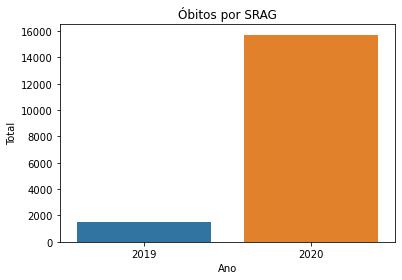

,Total,Ano
0,1497,2019
1,15715,2020


In [181]:
def grafico_comparativo(causa):

    total_obitos_2019 = dados_2019.groupby("tipo_doenca")["total"].sum()
    total_obitos_2020 = dados_2020.groupby("tipo_doenca")["total"].sum()
    
    lista = [int(total_obitos_2019.loc[causa]),int(total_obitos_2020.loc[causa])]
    dados = pd.DataFrame({"Total":lista,
                          "Ano":[2019,2020]})
    
    plt.figure(figsize=(6,4))
    plt.title(f"Óbitos por {causa}")
    sns.barplot(x="Ano",y="Total",data=dados)
    plt.show()

    return dados

grafico_comparativo("SRAG")


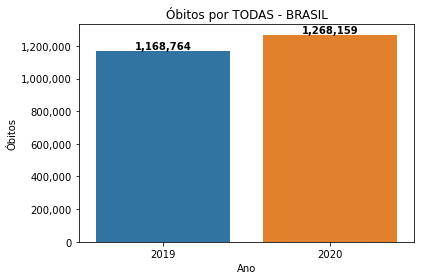

In [53]:
def grafico_comparativo_2(causa="TODAS",estado="BRASIL"):

    if estado == "BRASIL":
        if causa == "TODAS":
            total_obitos_2019 = dados_2019["total"].sum()
            total_obitos_2020 = dados_2020["total"].sum()
            lista = [int(total_obitos_2019),int(total_obitos_2020)]
        else:
            total_obitos_2019 = dados_2019.groupby("tipo_doenca")["total"].sum()
            total_obitos_2020 = dados_2020.groupby("tipo_doenca")["total"].sum()
            lista = [int(total_obitos_2019.loc[causa]),int(total_obitos_2020.loc[causa])]
    else:
        if causa == "TODAS":
            total_obitos_2019 = dados_2019.groupby("uf")["total"].sum()
            total_obitos_2020 = dados_2020.groupby("uf")["total"].sum()
            lista = [int(total_obitos_2019.loc[estado]),int(total_obitos_2020.loc[estado])]    
        else:
            total_obitos_2019 = dados_2019.groupby(["tipo_doenca","uf"])["total"].sum().unstack().fillna(0).stack()
            total_obitos_2020 = dados_2020.groupby(["tipo_doenca","uf"])["total"].sum().unstack().fillna(0).stack()

            lista = [int(total_obitos_2019.loc[causa,estado]),int(total_obitos_2020.loc[causa,estado])]

    dados = pd.DataFrame({"Total":lista,
                           "Ano":[2019,2020]})

    
    plt.figure(figsize=(6,4))
    plt.title(f"Óbitos por {causa} - {estado}")
    
    graph = sns.barplot(x="Ano",y="Total",data=dados)
    graph.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    plt.xlabel("Ano")
    plt.ylabel("Óbitos")
    
    for p in graph.patches:
        graph.annotate('{:,.0f}'.format(p.get_height()),(p.get_x()+0.4,p.get_height()),ha="center",va="bottom",color="black",                         fontweight="bold")

    plt.show()
 
grafico_comparativo_2(causa="TODAS",estado="BRASIL")

## 1 Explorar outros campos da base de dados (sexo, idade,localização geográfica) 